# Initialize system

In [1]:
### Setup the library ###
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import math
import pprint
import inspect 
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )

import setupLibPaths

import ePix320kM as devBoard

args = None

# ONLY RUN ONCE!
# Defining root
root =  devBoard.Root(   
        top_level  = rootTopLevel,
        dev        = '/dev/datadev_0',
        pollEn     = False,
        initRead   = True,
        serverPort = 9099)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

GeneralError: AxiStreamDma::AxiStreamDma: General Error: Failed to open device file /dev/datadev_0 with dest 0x0! Another process may already have it open!

In [ ]:
# ONLY RUN ONCE!
# Defining root
root =  devBoard.Root(   
        top_level  = rootTopLevel,
        dev        = '/dev/datadev_0',
        pollEn     = False,
        initRead   = True,
        serverPort = 9099)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

In [2]:
# Useful short names
APP  = root.App
AXIV = root.Core.AxiVersion
ASICTOP = APP.AsicTop
TRIG = ASICTOP.TriggerRegisters
ASIC0 = APP.Mv2Asic[0]
ASIC1 = APP.Mv2Asic[1]
ASIC2 = APP.Mv2Asic[2]
ASIC3 = APP.Mv2Asic[3]
HSDAC = APP.Dac.FastDac 
PKREG0 = ASICTOP.DigAsicStrmRegisters0
PKREG1 = ASICTOP.DigAsicStrmRegisters1
PKREG2 = ASICTOP.DigAsicStrmRegisters2
PKREG3 = ASICTOP.DigAsicStrmRegisters3
BATCHER0 = ASICTOP.BatcherEventBuilder0
BATCHER1 = ASICTOP.BatcherEventBuilder1
BATCHER2 = ASICTOP.BatcherEventBuilder2
BATCHER3 = ASICTOP.BatcherEventBuilder3
DEBUG0 = root._dbg[0]
DEBUG1 = root._dbg[1]
DEBUG2 = root._dbg[2]
DEBUG3 = root._dbg[3]
DATARCV0 = root.DataReceiver0
DATARCV1 = root.DataReceiver1
DATARCV2 = root.DataReceiver2
DATARCV3 = root.DataReceiver3
FULLRATERCV0 = root.fullRateDataReceiver[0]
FULLRATERCV1 = root.fullRateDataReceiver[1]
FULLRATERCV2 = root.fullRateDataReceiver[2]
FULLRATERCV3 = root.fullRateDataReceiver[3]

NameError: name 'root' is not defined

In [3]:
# Set & Read ScratchPad
print(hex(AXIV.ScratchPad.get()))
AXIV.ScratchPad.set(0xdeadbeef)
print(hex(AXIV.ScratchPad.get()))

NameError: name 'AXIV' is not defined

In [4]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([3,1,1,1,1])

NameError: name 'root' is not defined

In [5]:
root.disableAndCleanAllFullRateDataRcv()
root.enableDataRcv(False)
root.enableAllAsics(False)
root.enableAsic(3, True)
DEBUG3.enableDataDebug()
DEBUG3.cleanData()

NameError: name 'root' is not defined

# Lorenzo - Helper functions

In [6]:
%run dataProcFunctions.ipynb     #this is were my function was stored

# Set registers and variables

In [7]:
# Set threshold to the minimum voltage (maximum energy, should not switch)
ASIC3.CompTH_ePixM.set(0)

# Reference pixel
ref_row = 100
ref_col = 150

plt.figure(figsize = (10,5))


for RefN_val, RefP_val in np.ndindex(4,4):
    print('--- Acquiring data value {}/{} ---'.format(RefN_val,RefP_val))
    ASIC3.RefinN.set(RefN_val)
    ASIC3.RefinP.set(RefP_val)
    # Get ramps and calculate gain
    ChInjValues, PixOutValues = ChInjRamp(numberOfTriggers=3,Min=0,Max=600,numSteps=30)
    plt.plot(ChInjValues, PixOutValues, label='{}/{}'.format(RefN_val,RefP_val))

    #     gain[RefN_val,RefP_val] = np.polyfit(ChInjValues, PixOutValues, 1)[0]
   


plt.ylabel("Output [ADUs]")
plt.xlabel("Pulser Value [a.u.]")
plt.title('Ramp scan for pixel [{},{}]'.format(ref_row,ref_col))
plt.legend()

NameError: name 'ASIC3' is not defined

In [8]:
# Set threshold to the minimum voltage (maximum energy, should not switch)
ASIC3.CompTH_ePixM.set(32)
ASIC3.RefinN.set(6)
ASIC3.RefinP.set(1)


# Reference pixel
ref_row = 100
ref_col = 150

plt.figure(figsize = (10,5))


for Precharge_DAC_ePixM in [16,24,32,40,48]:
    print('--- Acquiring data value {} ---'.format(Precharge_DAC_ePixM))
    ASIC3.Precharge_DAC_ePixM.set(Precharge_DAC_ePixM)
    # Get ramps and calculate gain
    ChInjValues, PixOutValues = ChInjRamp(numberOfTriggers=3,Min=50,Max=1023,numSteps=40)
    plt.plot(ChInjValues, clearB16(PixOutValues.astype(int)), label='Precharge_DAC_ePixM: {}'.format(Precharge_DAC_ePixM),marker='o')
  
plt.ylabel("Output [ADUs]")
plt.xlabel("Pulser Value [a.u.]")
plt.title('Ramp scan for pixel [{},{}]'.format(ref_row,ref_col))
plt.legend()

NameError: name 'ASIC3' is not defined

# Verify that we can run in fixed HG / fixed LG by changing the Thr value

--- Acquiring data value 0 ---
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Descrambled
(192, 384, 3)
Data Des

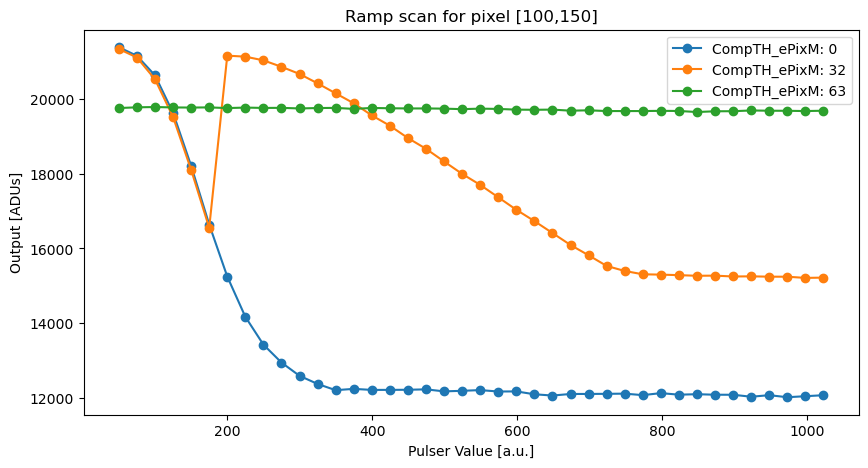

In [26]:
# Set threshold to the minimum voltage (maximum energy, should not switch)
ASIC3.RefinN.set(6)
ASIC3.RefinP.set(1)
ASIC3.CompTH_ePixM.set(32)
ASIC3.Precharge_DAC_ePixM.set(36)

# Reference pixel
ref_row = 100
ref_col = 150

plt.figure(figsize = (10,5))


for CompTH_ePixM in [0,32,63]:
    print('--- Acquiring data value {} ---'.format(CompTH_ePixM))
    ASIC3.CompTH_ePixM.set(CompTH_ePixM)
    # Get ramps and calculate gain
    ChInjValues, PixOutValues = ChInjRamp(numberOfTriggers=3,Min=50,Max=1023,numSteps=40)
    plt.plot(ChInjValues, clearB16(PixOutValues.astype(int)), label='CompTH_ePixM: {}'.format(CompTH_ePixM),marker='o')
  
plt.ylabel("Output [ADUs]")
plt.xlabel("Pulser Value [a.u.]")
plt.title('Ramp scan for pixel [{},{}]'.format(ref_row,ref_col))
plt.legend()